In [ ]:
!pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
import pandas as pd
print(pd.__version__)

1.0.5


# Read all files from the directory

In [ ]:
# Create data frames for each stock 
apple_df = pd.read_csv('/content/drive/Shareddrives/Data690StockProject/New_datafiles/apple_data.csv')
amazon_df= pd.read_csv('/content/drive/Shareddrives/Data690StockProject/New_datafiles/amazon_data.csv')
doge_df = pd.read_csv('/content/drive/Shareddrives/Data690StockProject/New_datafiles/doge_data.csv')
bitcoin_df = pd.read_csv('/content/drive/Shareddrives/Data690StockProject/New_datafiles/bitcoin_data.csv')
# #eth_df_reddit = pd.read_csv('/content/drive/Shareddrives/Data690StockProject/New_datafiles/ethereum _data.csv')
# # eth_df_twitter= pd.read_csv('/content/drive/Shareddrives/Data690StockProject/New_datafiles/ethereum _data.csv')
gamestop_df = pd.read_csv('/content/drive/Shareddrives/Data690StockProject/New_datafiles/gamestop_data.csv')
google_df = pd.read_csv('/content/drive/Shareddrives/Data690StockProject/New_datafiles/google_data.csv')
microsoft_df = pd.read_csv('/content/drive/Shareddrives/Data690StockProject/New_datafiles/microsoft_data.csv')
tesla_df = pd.read_csv('/content/drive/Shareddrives/Data690StockProject/New_datafiles/tesla_data.csv')


## Explaratory Data Analysis

In [ ]:
# The visualization 
#all_stocks_df consists of all the stocks and the coins data. 
reddit_stock_df= all_stocks_df[['time','compound_x','compound_y','ticker','volume','close']].copy()
# make the data column an index
#New_apple_stock.set_index('date', inplace=True)
New_stock_df = New_stock_df.replace(np.nan, 0)
New_stock_df.head()


,time,compound_x,compound_y,ticker,volume,close
0,2021-11-13 02:00:00,0.00,0.59,AAPL,0.00,0.00
1,2021-11-13 03:00:00,0.00,0.37,AAPL,0.00,0.00
2,2021-11-13 04:00:00,0.00,0.37,AAPL,0.00,0.00
3,2021-11-13 05:00:00,0.00,0.43,AAPL,0.00,0.00
4,2021-11-13 06:00:00,0.00,0.27,AAPL,0.00,0.00


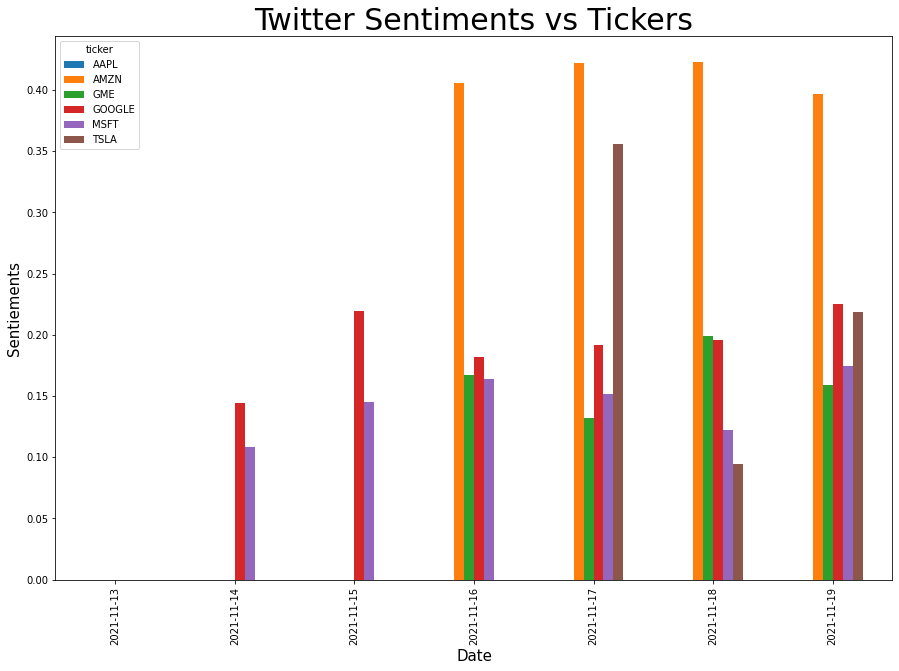

In [ ]:
# Vissualize the twitter sentiments by tickers for a week.

New_stock_df['time'] = pd.to_datetime(New_stock_df.time).dt.date # change the time to datetime


mean_stocks = New_stock_df.groupby(['ticker','time']).mean()
mean_stocks = mean_stocks.unstack()
mean_stocks=mean_stocks.xs('compound_x', axis ='columns').transpose()
mean_stocks.plot(kind='bar',figsize=(15,10))
plt.xlabel('Date',fontsize=(15))
plt.ylabel('Sentiements',fontsize=(15))
plt.title('Twitter Sentiments vs Tickers',fontsize=(30))
plt.show()

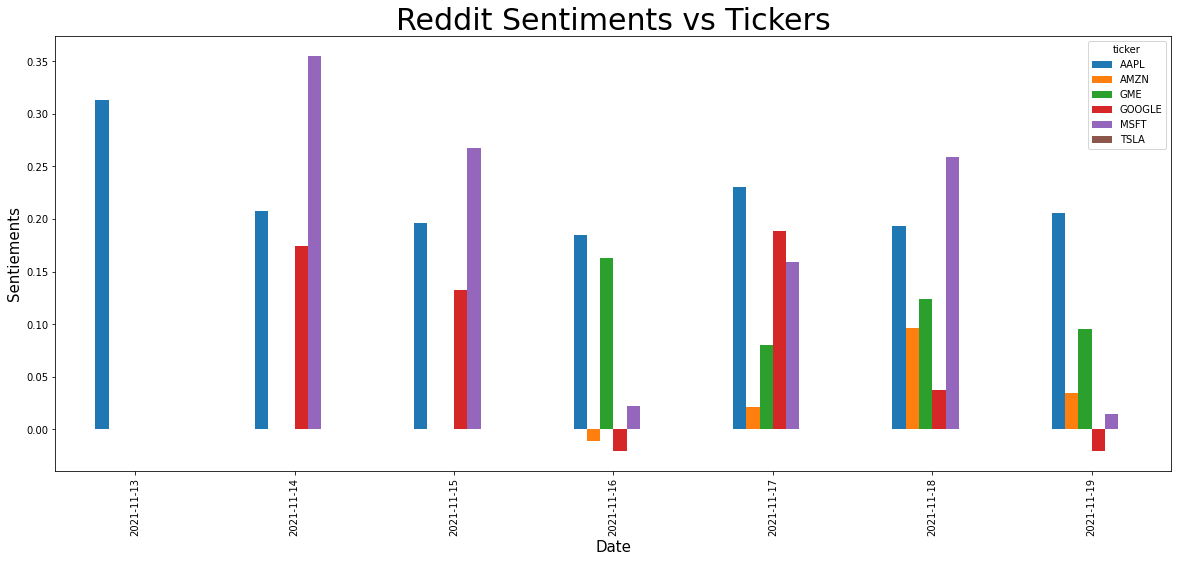

In [ ]:
# Vissualize the Reddit sentiments by Tickers for a week

mean_stock = New_stock_df.groupby(['ticker','time']).mean()
mean_stock = mean_stock.unstack()
mean_stock=mean_stock.xs('compound_y', axis ='columns').transpose()
mean_stock.plot(kind='bar',figsize =(20,8))
plt.xlabel('Date',fontsize=(15))
plt.ylabel('Sentiements',fontsize=(15))
plt.title('Reddit Sentiments vs Tickers',fontsize=(30))
plt.show()

In [ ]:
# Then get the price difference before that day
New_stock_df['price_difference'] = New_stock_df['close'].diff()
New_stock_df = New_stock_df.iloc[1:,:].reset_index(drop=True)
New_stock_df.head()

,time,compound_x,compound_y,ticker,volume,close,price_difference
0,2021-11-13,0.00,0.37,AAPL,0.00,0.00,0.00
1,2021-11-13,0.00,0.37,AAPL,0.00,0.00,0.00
2,2021-11-13,0.00,0.43,AAPL,0.00,0.00,0.00
3,2021-11-13,0.00,0.27,AAPL,0.00,0.00,0.00
4,2021-11-13,0.00,0.20,AAPL,0.00,0.00,0.00


### Create columns for Reddit and Twitter sentiments

In [ ]:
# Iterate through the compound column to get sentments and creat a column in dataframe
Positive_sentiment_threshold = 0.05
Negative_sentiment_threshold = -0.05
sentiments_x = []
sentiments_y = []
for sentiment_score in New_stock_df['compound_x']:
  if sentiment_score >= Positive_sentiment_threshold:
    sentiments_x.append('Positive')
  elif sentiment_score <= Negative_sentiment_threshold:
    sentiments_x.append('Negative')
  else:
    sentiments_x.append('Neutral')
New_stock_df['sentiment_x'] = sentiments_x

for sentiment_score in New_stock_df['compound_y']:
  if sentiment_score >= Positive_sentiment_threshold:
    sentiments_y.append('Positive')
  elif sentiment_score <= Negative_sentiment_threshold:
    sentiments_y.append('Negative')
  else:
    sentiments_y.append('Neutral')

New_stock_df['sentiment_y'] = sentiments_y

In [ ]:
New_stock_df.head()

,time,compound_x,compound_y,ticker,volume,close,price_difference,sentiment_x,sentiment_y
0,2021-11-13,0.00,0.37,AAPL,0.00,0.00,0.00,Neutral,Positive
1,2021-11-13,0.00,0.37,AAPL,0.00,0.00,0.00,Neutral,Positive
2,2021-11-13,0.00,0.43,AAPL,0.00,0.00,0.00,Neutral,Positive
3,2021-11-13,0.00,0.27,AAPL,0.00,0.00,0.00,Neutral,Positive
4,2021-11-13,0.00,0.20,AAPL,0.00,0.00,0.00,Neutral,Positive


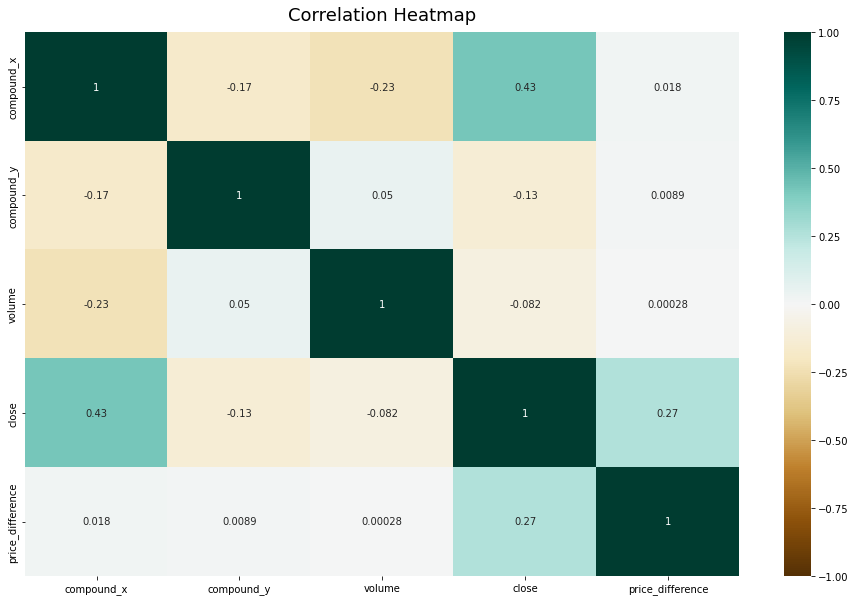

In [ ]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(New_stock_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
New_stock_df['sentiment_x'].value_counts()

Positive    453
Neutral     199
Negative      4
Name: sentiment_x, dtype: int64

In [ ]:
stock_sent_x= New_stock_df['sentiment_x'].value_counts(normalize=True).mul(100).round(1)
stock_sent_y = New_stock_df['sentiment_y'].value_counts(normalize=True).mul(100).round(1)
stock_sent_y= stock_sent_y.values.tolist()
stock_sent_y.remove(35.8)
stock_sent_y.insert(0,35.8)

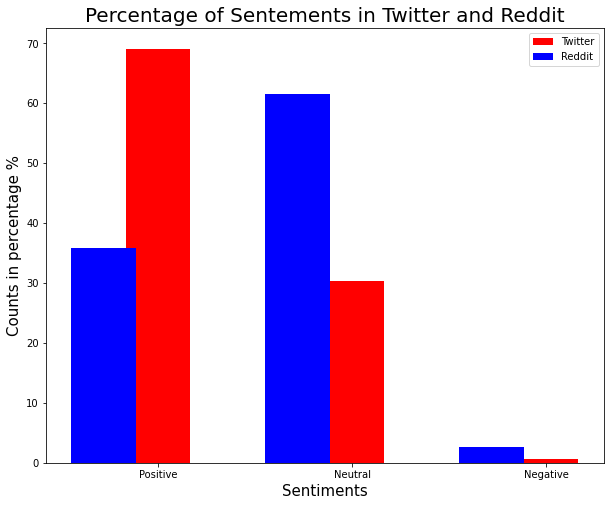

In [ ]:
# Visualization percentage of sentiments from twitter and reddit
X = np.arange(3)
X_ticks = ['Positive','Neutral','Negative']
plt.figure(figsize=(10,8))
bar_width = 0.4
plt.bar(X,stock_sent_x.values, label='Twitter', width = bar_width/1.2,color ='r')
plt.bar(X-0.7*bar_width,stock_sent_y, label='Reddit',width = bar_width/1.2,color='b')
plt.xticks(X,X_ticks)
plt.xlabel('Sentiments', fontsize=(15))
plt.ylabel('Counts in percentage %',fontsize=(15) )
plt.title('Percentage of Sentements in Twitter and Reddit', fontsize=(20))
plt.legend()
plt.show()


## Analyzing the Data by the stocks' price trend with Sentiments

In [ ]:
# Create a categorical stock trend column
rise = 1
fall = -1
no_change = 0
stock_trend =[]
for score in New_stock_df['price_difference']:
  if score > 0:
    stock_trend.append(rise)
  elif score == 0:
    stock_trend.append(no_change)
  else:
    stock_trend.append(fall)

New_stock_df['stock_trend'] = stock_trend
New_stock_df['stock_trend'].value_counts()

 0    265
 1    213
-1    178
Name: stock_trend, dtype: int64

In [ ]:
New_stock_df.head()

,time,compound_x,compound_y,ticker,volume,close,price_difference,sentiment_x_Negative,sentiment_x_Neutral,sentiment_x_Positive,sentiment_y_Negative,sentiment_y_Neutral,sentiment_y_Positive,stock_trend
0,2021-11-13,0.00,0.37,AAPL,0.00,0.00,0.00,0,1,0,0,0,1,0
1,2021-11-13,0.00,0.37,AAPL,0.00,0.00,0.00,0,1,0,0,0,1,0
2,2021-11-13,0.00,0.43,AAPL,0.00,0.00,0.00,0,1,0,0,0,1,0
3,2021-11-13,0.00,0.27,AAPL,0.00,0.00,0.00,0,1,0,0,0,1,0
4,2021-11-13,0.00,0.20,AAPL,0.00,0.00,0.00,0,1,0,0,0,1,0


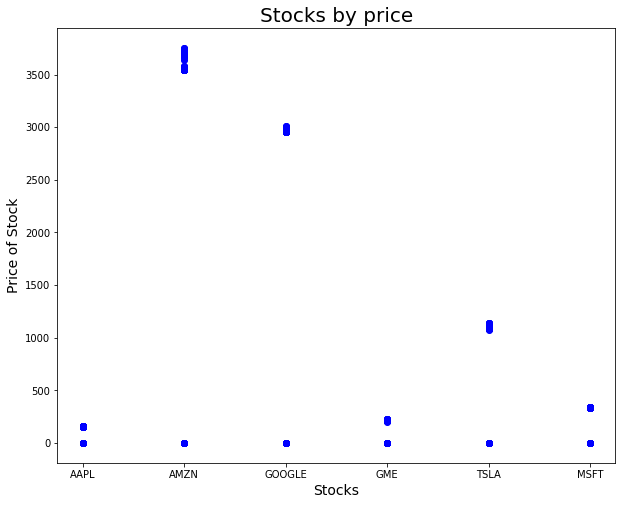

In [ ]:
# Visualization stock_trend vs sentiments

# Plot the stocks by their price
plt.figure(figsize=(10,8))
for i in range(0,New_stock_df.shape[0]):
   plt.scatter(New_stock_df['ticker'][i], New_stock_df['close'][i], color='b')

plt.title("Stocks by price",fontsize=20)
plt.ylabel('Price of Stock',fontsize=14)
plt.xlabel('Stocks',fontsize=14)
plt.show()

In [ ]:
# Get dummies for sentiments

#New_stock_df = pd.get_dummies(New_stock_df, columns = ['sentiment_x','sentiment_y'])
New_stock_df.tail()

,time,compound_x,compound_y,ticker,volume,close,price_difference,sentiment_x_Negative,sentiment_x_Neutral,sentiment_x_Positive,sentiment_y_Negative,sentiment_y_Neutral,sentiment_y_Positive
651,2021-11-19,0.15,0.00,MSFT,3083713.00,343.04,0.11,0,0,1,0,1,0
652,2021-11-19,0.06,0.00,MSFT,939245.00,343.11,0.07,0,0,1,0,1,0
653,2021-11-19,0.08,0.00,MSFT,31346.00,343.37,0.26,0,0,1,0,1,0
654,2021-11-19,0.22,0.00,MSFT,4169.00,343.22,-0.15,0,0,1,0,1,0
655,2021-11-19,0.14,0.00,MSFT,10976.00,343.55,0.33,0,0,1,0,1,0


In [ ]:
# Get X features and Target variable

X = New_stock_df.copy()
X.drop(['stock_trend','ticker','time','close'], axis=1, inplace= True)
X.head()

,compound_x,compound_y,volume,price_difference,sentiment_x_Negative,sentiment_x_Neutral,sentiment_x_Positive,sentiment_y_Negative,sentiment_y_Neutral,sentiment_y_Positive
0,0.00,0.37,0.00,0.00,0,1,0,0,0,1
1,0.00,0.37,0.00,0.00,0,1,0,0,0,1
2,0.00,0.43,0.00,0.00,0,1,0,0,0,1
3,0.00,0.27,0.00,0.00,0,1,0,0,0,1
4,0.00,0.20,0.00,0.00,0,1,0,0,0,1


In [ ]:
# Get the target variable
y_disc =New_stock_df['stock_trend'].values.reshape(-1,1) # Fit for classification model


In [ ]:
 # Split the data into train and test

X_train, X_test, y_disc_train, y_disc_test = train_test_split(X, y_disc, test_size=.2,random_state =123)

# Scale the data

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)

X_test_scaled = X_scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.98648744, -0.47133818, -0.27476301, ..., -0.14643256,
         0.80164408, -0.76673254],
       [-1.0831868 ,  0.52818263, -0.27742708, ..., -0.14643256,
        -1.2474364 ,  1.30423576],
       [ 0.20466488, -0.47133818, -0.2787684 , ..., -0.14643256,
         0.80164408, -0.76673254],
       ...,
       [ 0.03321162, -0.47133818, -0.27982766, ..., -0.14643256,
         0.80164408, -0.76673254],
       [ 1.10762951, -0.47133818, -0.27982766, ..., -0.14643256,
         0.80164408, -0.76673254],
       [-0.91229184, -0.47133818, -0.27982766, ..., -0.14643256,
         0.80164408, -0.76673254]])

## Train LazyClassifier to get the best model for classification

In [ ]:
clf_all = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions  = clf_all.fit(X_train_scaled,X_test_scaled, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 16.41it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,None,1.00,0.13
BaggingClassifier,1.00,1.00,None,1.00,0.04
XGBClassifier,1.00,1.00,None,1.00,0.08
RandomForestClassifier,1.00,1.00,None,1.00,0.19
LGBMClassifier,1.00,1.00,None,1.00,0.17
DecisionTreeClassifier,1.00,1.00,None,1.00,0.01
ExtraTreesClassifier,0.92,0.92,None,0.92,0.16
ExtraTreeClassifier,0.81,0.81,None,0.81,0.01
GaussianNB,0.67,0.68,None,0.63,0.01


In [ ]:
# Train the Randomforest classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf_RanForest = RandomForestClassifier(max_depth=2, random_state=0)
model= clf_RanForest.fit(X_train_scaled, y_disc_train)

In [ ]:
# predict the model
predicted = model.predict(X_test_scaled)

In [ ]:
# The accuracy of the model

accuracy = accuracy_score(predicted, y_disc_test)
accuracy


0.946969696969697

In [ ]:
# Classification report
print(classification_report(predicted,y_disc_test))

              precision    recall  f1-score   support

          -1       0.81      1.00      0.90        30
           0       1.00      0.87      0.93        55
           1       1.00      1.00      1.00        47

    accuracy                           0.95       132
   macro avg       0.94      0.96      0.94       132
weighted avg       0.96      0.95      0.95       132



 The Classification model based on stock price trend performs well and scord 94% accuracy. However to see how it works for more data we added more data and train the regreesion model.

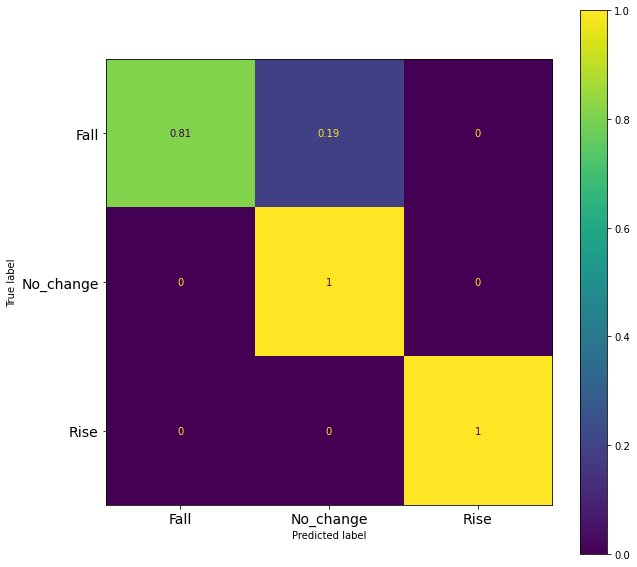

In [ ]:
# Plot the confusion matrix for the predict and True value
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_RanForest, X_test_scaled, y_disc_test,normalize='true',ax=ax) 

plt.xticks(range(3), ['Fall','No_change','Rise'], fontsize=14)
plt.yticks(range(3), ['Fall','No_change','Rise'], fontsize=14) 
plt.show()

# Train Regression model for each Stock 

In [ ]:
# from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix
from lazypredict.Supervised import LazyRegressor



In [ ]:
# Create two functions to get sentiments from compound columns of two medias
Positive_sentiment_threshold = 0.05
Negative_sentiment_threshold = -0.05
def sentiments_tweet(data):

  
    sentiments_x = []
   
    for sentiment_score in data:
      if sentiment_score >= Positive_sentiment_threshold:
        sentiments_x.append('Positive')
      elif sentiment_score <= Negative_sentiment_threshold:
        sentiments_x.append('Negative')
      else:
        sentiments_x.append('Neutral')
    return sentiments_x
def sentiments_reddit(data):
      sentiments_y = []

      for sentiment_score in data:
          if sentiment_score >= Positive_sentiment_threshold:
            sentiments_y.append('Positive')
          elif sentiment_score <= Negative_sentiment_threshold:
            sentiments_y.append('Negative')
          else:
            sentiments_y.append('Neutral')
      return sentiments_y


# Analysis of each Stock using regeression model

## Apple Stock

In [ ]:
# Apple Stock
apple_df_reg=apple_df[['Sentiment','compound','time','Close','Volume']].copy()
apple_df_reg=apple_df_reg.fillna()
sent_xap = sentiments_tweet(apple_df_reg['compound'])
sent_yap= sentiments_reddit(apple_df_reg['Sentiment'])
apple_df_reg['sentiment_apple_reddit']=sent_yap
apple_df_reg['sentiment_apple_tweet']=sent_xap

In [ ]:
# Get dummies for sentments

apple_df_reg = pd.get_dummies(apple_df_reg, columns = ['sentiment_apple_tweet','sentiment_apple_reddit'])

# Get X features and Target variable

X_apple = apple_df_reg.copy()#[['sentiment_apple_reddit','sentiment_apple_tweet','Volume_y']].copy()
X_apple.drop(['time','Close'], axis=1, inplace= True)
#X_apple.fillna(0)
# Get the target variable
y_apple= apple_df_reg['Close'].values.reshape(-1,1)  # Fit for regeression model
# Spliting the data into train and test
X_apple_train, X_apple_test, y_apple_train, y_apple_test = train_test_split(X_apple, y_apple, test_size=.2,random_state =123)



In [ ]:
# Scale the data

scaler_apple = StandardScaler()
X_scaler_apple = scaler_apple.fit(X_apple_train)
X_train_scaled_apple = X_scaler_apple.transform(X_apple_train)

X_test_scaled_apple = X_scaler_apple.transform(X_apple_test)

## Train LazyRegressor model to chose better model

In [ ]:
#Lazy predict model

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_scaled_apple, X_test_scaled_apple, y_apple_train, y_apple_test)

100%|██████████| 42/42 [03:16<00:00,  4.67s/it]


In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.95,0.95,4.04,1.81
DecisionTreeRegressor,0.94,0.94,4.11,0.07
BaggingRegressor,0.94,0.94,4.25,0.23
XGBRegressor,0.93,0.93,4.66,0.96
ExtraTreesRegressor,0.92,0.92,4.90,1.22
ExtraTreeRegressor,0.87,0.87,6.35,0.06
LGBMRegressor,0.85,0.85,6.62,0.22
KNeighborsRegressor,0.85,0.85,6.78,0.35
HistGradientBoostingRegressor,0.82,0.82,7.46,0.85


 Based on the Lazy predict model the best model to train our data is RandomForestRegressor

### Model Training for Apple stock

In [ ]:
# Model Training
clf_RanForest = RandomForestRegressor(max_depth=2, random_state=0)
model_apple= clf_RanForest.fit(X_train_scaled_apple, y_apple_train)

# Model Prediction
predicted_apple = model_apple.predict(X_test_scaled_apple)

#Evaluate the model

print(mean_absolute_error(y_apple_test,predicted_apple))
print(mean_squared_error(y_apple_test, predicted_apple))
print(math.sqrt(mean_squared_error(y_apple_test, predicted_apple)))

print(r2_score(y_apple_test, predicted_apple))

10.179386371917445
161.35686647729852
12.702632265688026
0.4659233069207446


After traing the model prediction on Apple stock is well. Mean absolute error is 10 and MSE is 161, RMSE is 12, R square is about 47% which is not that much good.

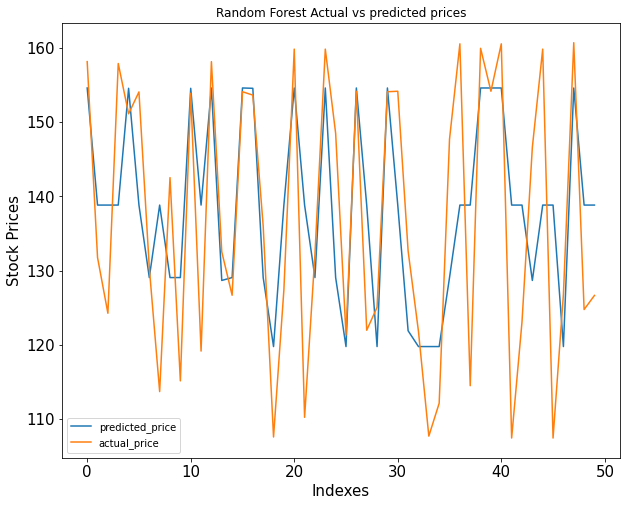

In [ ]:
# Vissualize the results

predicted_apple = pd.DataFrame(data=predicted_apple[:50], columns=['Prices'])
ax = predicted_apple.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest Actual vs predicted prices',fontsize=(15))#predicted value
ax.set_xlabel("Indexes", fontsize=(15))
ax.set_ylabel("Stock Prices", fontsize=(15))
y_apple_test_df = pd.DataFrame(y_apple_test[:50], columns = ['close'])
fig = y_apple_test_df.rename(columns={"close": "actual_price"}).plot(ax = ax,figsize=(10,8)).get_figure()#actual value

## Amazon Stock

In [ ]:
amazon_df_reg = amazon_df[['compound','Sentiment', 'Volume','Close']].copy()
amazon_df_reg= amazon_df_reg.fillna(0)
amazon_df_reg['Sentiment']= amazon_df_reg['Sentiment'].replace({'AMZN': 0})
amazon_df_reg['Sentiment'] = amazon_df_reg['Sentiment'].astype(np.float64)
amazon_df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17973 entries, 0 to 17972
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   compound   17973 non-null  float64
 1   Sentiment  17973 non-null  float64
 2   Volume     17973 non-null  float64
 3   Close      17973 non-null  float64
dtypes: float64(4)
memory usage: 561.8 KB


In [ ]:
# Amazon Stock
#amazon_df_reg = amazon_df[['compound','Sentiment', 'Volume','Close']].copy()
sent_xam = sentiments_tweet(amazon_df_reg['compound'])
sent_yam= sentiments_reddit(amazon_df_reg['Sentiment'])
amazon_df_reg['sentiment_amazon_reddit']=sent_yam
amazon_df_reg['sentiment_amazon_tweet']=sent_xam


In [ ]:
# Get dummies for sentments

amazon_df_reg = pd.get_dummies(amazon_df_reg, columns = ['sentiment_amazon_reddit','sentiment_amazon_tweet'])

# Get X features and Target variable

X_amazon = amazon_df_reg.copy()
X_amazon.drop(['Close'], axis=1, inplace= True) #'TICKER' WAS IN THE COLUMN LIST TO BE DROPPED 
# Get the target variable
y_amazon= amazon_df_reg['Close'].values.reshape(-1,1)  # Fit for regeression model
# Spliting the data into train and test
X_amazon_train, X_amazon_test, y_amazon_train, y_amazon_test = train_test_split(X_amazon, y_amazon, test_size=.2,random_state =123)

# Scale the data

scaler_amazon = StandardScaler()
X_scaler_amazon = scaler_amazon.fit(X_amazon_train)
X_train_scaled_amazon = X_scaler_amazon.transform(X_amazon_train)

X_test_scaled_amazon = X_scaler_amazon.transform(X_amazon_test)


### Model Training for Amazon stock

In [ ]:
# Model Training
clf_RanForest = RandomForestRegressor(max_depth=2, random_state=0)
model_amazon= clf_RanForest.fit(X_train_scaled_amazon, y_amazon_train)

# Model Prediction
predicted_amazon = model_amazon.predict(X_test_scaled_amazon)

#Evaluate the model

print(mean_absolute_error(y_amazon_test,predicted_amazon))
print(mean_squared_error(y_amazon_test, predicted_amazon))
print(math.sqrt(mean_squared_error(y_amazon_test, predicted_amazon)))

print(r2_score(y_amazon_test, predicted_amazon))

93.2162785087116
19379.347844136995
139.20972611185252
0.6017745891537871


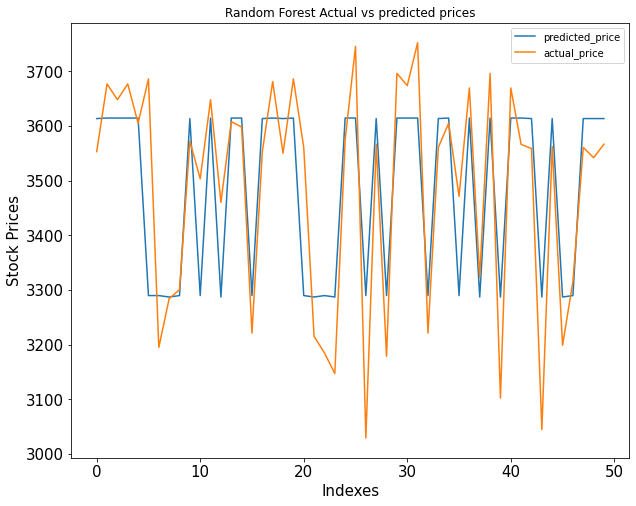

In [ ]:
# Vissualize the results

predicted_amazon = pd.DataFrame(data=predicted_amazon[:50], columns=['Prices'])
ax = predicted_amazon.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest Actual vs predicted prices',fontsize=(15))#predicted value
ax.set_xlabel("Indexes", fontsize=(15))
ax.set_ylabel("Stock Prices", fontsize=(15))
y_amazon_test_df = pd.DataFrame(y_amazon_test[:50], columns = ['close'])
fig = y_amazon_test_df.rename(columns={"close": "actual_price"}).plot(ax = ax,figsize=(10,8)).get_figure()#actual value

## Google Stock

In [ ]:
# Google Stock
google_df_reg = google_df[['Sentiment','compound', 'Volume','Close']].copy()
sent_xgo = sentiments_tweet(google_df_reg['compound'])
sent_ygo= sentiments_reddit(google_df_reg['Sentiment'])
google_df_reg['sentiment_google_reddit']=sent_xgo
google_df_reg['sentiment_google_tweet']=sent_ygo

In [ ]:
google_df_reg=google_df_reg.fillna(0)

google_df_reg = pd.get_dummies(google_df_reg, columns = ['sentiment_google_reddit','sentiment_google_tweet'])

# Get X features and Target variable

X_google = google_df_reg.copy()
X_google.drop(['Close'], axis=1, inplace= True) #'TICKER' WAS IN THE COLUMN LIST TO BE DROPPED 
# Get the target variable
y_google= google_df_reg['Close'].values.reshape(-1,1)  # Fit for regeression model
# Spliting the data into train and test
X_google_train, X_google_test, y_google_train, y_google_test = train_test_split(X_google, y_google, test_size=.2,random_state =123)

# Scale the data

scaler_google = StandardScaler()
X_scaler_google = scaler_google.fit(X_google_train)
X_train_scaled_google = X_scaler_google.transform(X_google_train)

X_test_scaled_google = X_scaler_google.transform(X_google_test)

###  Model Training for Google stock

In [ ]:
# Model Training
clf_RanForest = RandomForestRegressor(max_depth=2, random_state=0)
model_google= clf_RanForest.fit(X_train_scaled_google, y_google_train)

# Model Prediction
predicted_google = model_google.predict(X_test_scaled_google)

#Evaluate the model

print(mean_absolute_error(y_google_test,predicted_google))
print(mean_squared_error(y_google_test, predicted_google))
print(math.sqrt(mean_squared_error(y_google_test, predicted_google)))

print(r2_score(y_google_test, predicted_google))

260.39339660934985
135582.28576369458
368.2149993735923
0.47142234982399245


The model prediction performance for this stock is MAE scores 260, MSE 135582 and R-square error is about 47%. 

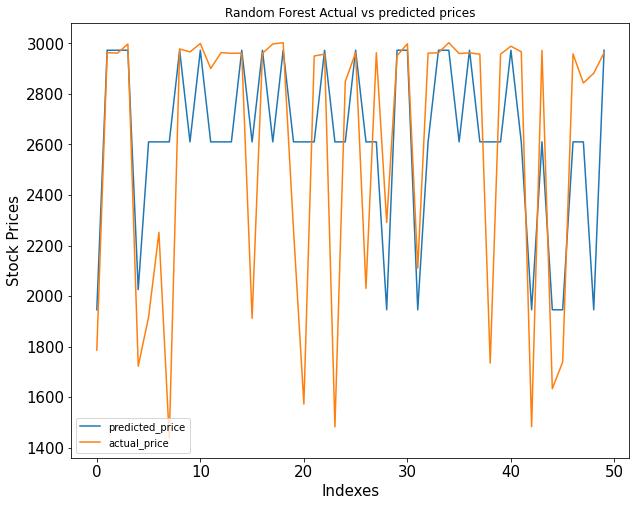

In [ ]:
# Vissualize the results

predicted_google = pd.DataFrame(data=predicted_google[:50], columns=['Prices'])
ax = predicted_google.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest Actual vs predicted prices',fontsize=(15))#predicted value
ax.set_xlabel("Indexes", fontsize=(15))
ax.set_ylabel("Stock Prices", fontsize=(15))
y_google_test_df = pd.DataFrame(y_google_test[:50], columns = ['close'])
fig = y_google_test_df.rename(columns={"close": "actual_price"}).plot(ax = ax,figsize=(10,8)).get_figure()#actual value

## Microsoft Stock

In [ ]:
# Microsoft Stock
microsoft_df_reg = microsoft_df[['Sentiment','compound', 'Volume','Close']].copy()
sent_xgo = sentiments_tweet(microsoft_df_reg['compound'])
sent_ygo= sentiments_reddit(microsoft_df_reg['Sentiment'])
microsoft_df_reg['sentiment_microsoft_tweet']=sent_xgo
microsoft_df_reg['sentiment_microsoft_reddit']=sent_ygo

In [ ]:
microsoft_df_reg

In [ ]:
# Get dummies for sentments
microsoft_df_reg=microsoft_df_reg.fillna(0)
microsoft_df_reg = pd.get_dummies(microsoft_df_reg, columns = ['sentiment_microsoft_tweet','sentiment_microsoft_reddit'])

# Get X features and Target variable

X_microsoft = microsoft_df_reg.copy()
X_microsoft.drop(['Close'], axis=1, inplace= True)
# Get the target variable
y_microsoft= microsoft_df_reg['Close'].values.reshape(-1,1)  # Fit for regeression model
# Spliting the data into train and test
X_microsoft_train, X_microsoft_test, y_microsoft_train, y_microsoft_test = train_test_split(X_microsoft, y_microsoft, test_size=.2,random_state =123)

# Scale the data

scaler_microsoft = StandardScaler()
X_scaler_microsoft = scaler_microsoft.fit(X_microsoft_train)
X_train_scaled_microsoft = X_scaler_microsoft.transform(X_microsoft_train)

X_test_scaled_microsoft = X_scaler_microsoft.transform(X_microsoft_test)

###  Model Training for Microsoft

In [ ]:
# Model Training
clf_RanForest = RandomForestRegressor(max_depth=2, random_state=0)
model_microsoft= clf_RanForest.fit(X_train_scaled_microsoft, y_microsoft_train)

# Model Prediction
predicted_microsoft = model_microsoft.predict(X_test_scaled_microsoft)

#Evaluate the model

print(mean_absolute_error(y_microsoft_test,predicted_microsoft))
print(mean_squared_error(y_microsoft_test, predicted_microsoft))
print(math.sqrt(mean_squared_error(y_microsoft_test, predicted_microsoft)))

print(r2_score(y_microsoft_test, predicted_microsoft))

24.74869895315076
1269.8004482112499
35.634259473310934
0.4754820461735383


This model prediction performance on MAE 24.7, MSE is 1269 , RMSE 35  and 47%

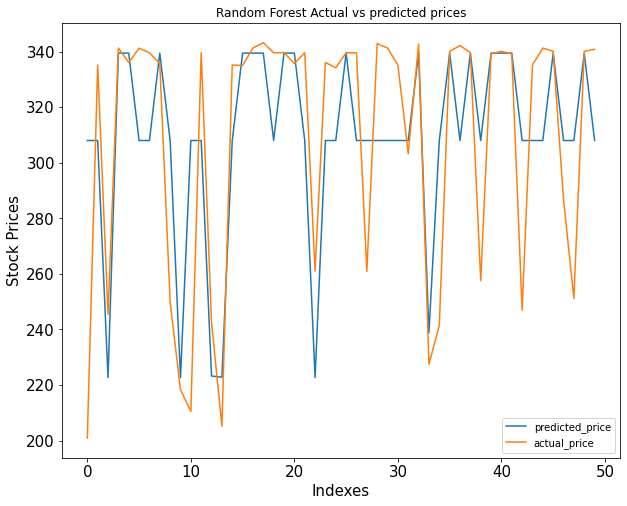

In [ ]:
# Vissualize the results

predicted_microsoft = pd.DataFrame(data=predicted_microsoft[:50], columns=['Prices'])
ax = predicted_microsoft.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest Actual vs predicted prices',fontsize=(15))#predicted value
ax.set_xlabel("Indexes", fontsize=(15))
ax.set_ylabel("Stock Prices", fontsize=(15))
y_microsoft_test_df = pd.DataFrame(y_microsoft_test[:50], columns = ['close'])
fig = y_microsoft_test_df.rename(columns={"close": "actual_price"}).plot(ax = ax,figsize=(10,8)).get_figure()#actual value

## GemeStop Stock

In [ ]:
# Gamestop Stock
gamestop_df_reg = gamestop_df[['Sentiment','compound', 'Close','Volume']].copy()
sent_xgo = sentiments_tweet(gamestop_df_reg['compound'])
sent_ygo= sentiments_reddit(gamestop_df_reg['Sentiment'])
gamestop_df_reg['sentiment_gamestop_tweet']=sent_xgo
gamestop_df_reg['sentiment_gamestop_reddit']=sent_ygo

In [ ]:
# Get dummies for sentments
gamestop_df_reg=gamestop_df_reg.fillna(0)
gamestop_df_reg = pd.get_dummies(gamestop_df_reg, columns = ['sentiment_gamestop_tweet','sentiment_gamestop_reddit'])

# Get X features and Target variable

X_gamestop = gamestop_df_reg.copy()
X_gamestop.drop(['Close'], axis=1, inplace= True)
# Get the target variable
y_gamestop= gamestop_df_reg['Close'].values.reshape(-1,1)  # Fit for regeression model
# Spliting the data into train and test
X_gamestop_train, X_gamestop_test, y_gamestop_train, y_gamestop_test = train_test_split(X_gamestop, y_gamestop, test_size=.2,random_state =123)

# Scale the data

scaler_gamestop = StandardScaler()
X_scaler_gamestop = scaler_gamestop.fit(X_gamestop_train)
X_train_scaled_gamestop = X_scaler_gamestop.transform(X_gamestop_train)

X_test_scaled_gamestop = X_scaler_gamestop.transform(X_gamestop_test)

### Model Training for Gamestop

In [ ]:
# Model Training
clf_RanForest = RandomForestRegressor(max_depth=2, random_state=0)
model_gamestop= clf_RanForest.fit(X_train_scaled_gamestop, y_gamestop_train)

# Model Prediction
predicted_gamestop = model_gamestop.predict(X_test_scaled_gamestop)

#Evaluate the model

print(mean_absolute_error(y_gamestop_test,predicted_gamestop))
print(mean_squared_error(y_gamestop_test, predicted_gamestop))
print(math.sqrt(mean_squared_error(y_gamestop_test, predicted_gamestop)))

print(r2_score(y_gamestop_test, predicted_gamestop))

76.49378031311603
7874.169064470412
88.73651483166562
0.06592155357970264


The model for microsoft stock prediction performace scores 76 for MAE, 7874 for MSE and R-square is 6%. 

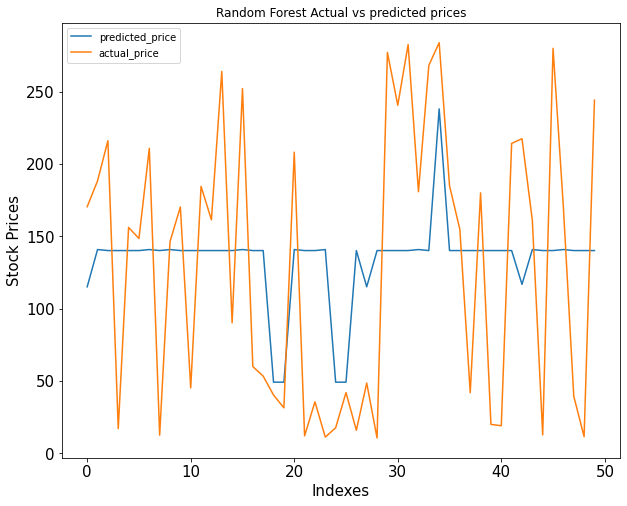

In [ ]:
# Vissualize the results

predicted_gamestop = pd.DataFrame(data=predicted_gamestop[:50], columns=['Prices'])
ax = predicted_gamestop.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest Actual vs predicted prices',fontsize=(15))#predicted value
ax.set_xlabel("Indexes", fontsize=(15))
ax.set_ylabel("Stock Prices", fontsize=(15))
y_gamestop_test_df = pd.DataFrame(y_gamestop_test[:50], columns = ['close'])
fig = y_gamestop_test_df.rename(columns={"close": "actual_price"}).plot(ax = ax,figsize=(10,8)).get_figure()#actual value

## Tesla stock

In [ ]:
# Tesla Stock
tesla_df_reg = tesla_df[['Sentiment','compound', 'Volume','Close']].copy()
sent_xtl = sentiments_tweet(tesla_df_reg['compound'])
sent_ytl= sentiments_reddit(tesla_df_reg['Sentiment'])
tesla_df_reg['sentiment_tesla_reddit']=sent_ytl
tesla_df_reg['sentiment_tesla_tweet']=sent_xtl

In [ ]:
# Get dummies for sentments
tesla_df_reg = tesla_df_reg.fillna(0)
tesla_df_reg = pd.get_dummies(tesla_df_reg, columns = ['sentiment_tesla_reddit','sentiment_tesla_tweet'])

# Get X features and Target variable

X_tesla = tesla_df_reg.copy()
X_tesla.drop(['Close'], axis=1, inplace= True)
# Get the target variable
y_tesla= tesla_df_reg['Close'].values.reshape(-1,1)  # Fit for regeression model
# Spliting the data into train and test
X_tesla_train, X_tesla_test, y_tesla_train, y_tesla_test = train_test_split(X_tesla, y_tesla, test_size=.2,random_state =123)

# Scale the data

scaler_tesla = StandardScaler()
X_scaler_tesla = scaler_tesla.fit(X_tesla_train)
X_train_scaled_tesla = X_scaler_tesla.transform(X_tesla_train)

X_test_scaled_tesla = X_scaler_tesla.transform(X_tesla_test)

### Model Training for Tesla

In [ ]:
# Model Training
clf_RanForest = RandomForestRegressor(max_depth=2, random_state=0)
model_tesla= clf_RanForest.fit(X_train_scaled_tesla, y_tesla_train)

# Model Prediction
predicted_tesla = model_tesla.predict(X_test_scaled_tesla)

#Evaluate the model

print(mean_absolute_error(y_tesla_test,predicted_tesla))
print(mean_squared_error(y_tesla_test, predicted_tesla))
print(math.sqrt(mean_squared_error(y_tesla_test, predicted_tesla)))

print(r2_score(y_tesla_test, predicted_tesla))

124.88154761015826
28232.779526130755
168.02612751036892
0.43036857201722245


The model performance by MAE 124.9 , MSE 28232 and R-Square is 43%

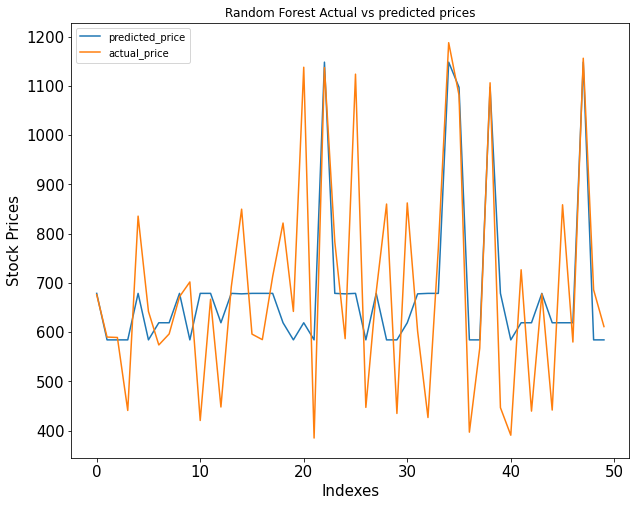

In [ ]:
# Vissualize the results

predicted_tesla = pd.DataFrame(data=predicted_tesla[:50], columns=['Prices'])
ax = predicted_tesla.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest Actual vs predicted prices',fontsize=(15))#predicted value
ax.set_xlabel("Indexes", fontsize=(15))
ax.set_ylabel("Stock Prices", fontsize=(15))
y_tesla_test_df = pd.DataFrame(y_tesla_test[:50], columns = ['close'])
fig = y_tesla_test_df.rename(columns={"close": "actual_price"}).plot(ax = ax,figsize=(10,8)).get_figure()#actual value

## Bitcoin Stock

In [ ]:
# Bitcoin 
bitcoin_df_reg = bitcoin_df[['Sentiment','compound','Close']].copy()
sent_xbit= sentiments_tweet(bitcoin_df_reg['compound'])
sent_ybit= sentiments_reddit(bitcoin_df_reg['Sentiment'])
bitcoin_df_reg['sentiment_bitcoin_reddit']=sent_ybit
bitcoin_df_reg['sentiment_bitcoin_tweet']=sent_xbit

In [ ]:
# Get dummies for sentments
bitcoin_df_reg=bitcoin_df_reg.fillna(0)
bitcoin_df_reg = pd.get_dummies(bitcoin_df_reg, columns = ['sentiment_bitcoin_reddit','sentiment_bitcoin_tweet'])

# Get X features and Target variable

X_bitcoin = bitcoin_df_reg.copy()
X_bitcoin.drop(['Close'], axis=1, inplace= True)
# Get the target variable
y_bitcoin= bitcoin_df_reg['Close'].values.reshape(-1,1)  # Fit for regeression model
# Spliting the data into train and test
X_bitcoin_train, X_bitcoin_test, y_bitcoin_train, y_bitcoin_test = train_test_split(X_bitcoin, y_bitcoin, test_size=.2,random_state =123)

# Scale the data

scaler_bitcoin = StandardScaler()
X_scaler_bitcoin = scaler_bitcoin.fit(X_bitcoin_train)
X_train_scaled_bitcoin = X_scaler_bitcoin.transform(X_bitcoin_train)

X_test_scaled_bitcoin = X_scaler_bitcoin.transform(X_bitcoin_test)

#### Model Training for Bitcoin

In [ ]:
# Model Training
clf_RanForest = RandomForestRegressor(max_depth=2, random_state=0)
model_bitcoin= clf_RanForest.fit(X_train_scaled_bitcoin, y_bitcoin_train)

# Model Prediction
predicted_bitcoin = model_bitcoin.predict(X_test_scaled_bitcoin)

#Evaluate the model

print(mean_absolute_error(y_bitcoin_test,predicted_bitcoin))
print(mean_squared_error(y_bitcoin_test, predicted_bitcoin))
print(math.sqrt(mean_squared_error(y_bitcoin_test, predicted_bitcoin)))

print(r2_score(y_bitcoin_test, predicted_bitcoin))

4010.9033662871284
42665383.75087022
6531.8744438997155
0.1652129573602692


The model performs not well R-Square 16%

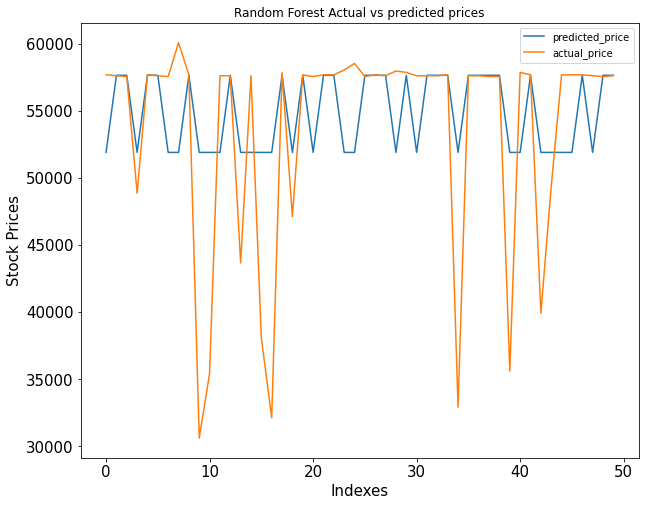

In [ ]:
# Vissualize the results

predicted_bitcoin = pd.DataFrame(data=predicted_bitcoin[:50], columns=['Prices'])
ax = predicted_bitcoin.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest Actual vs predicted prices',fontsize=(15))#predicted value
ax.set_xlabel("Indexes", fontsize=(15))
ax.set_ylabel("Stock Prices", fontsize=(15))
y_bitcoin_test_df = pd.DataFrame(y_bitcoin_test[:50], columns = ['close'])
fig = y_bitcoin_test_df.rename(columns={"close": "actual_price"}).plot(ax = ax,figsize=(10,8)).get_figure()#actual value

### Ethereum  Stock

In [ ]:
# Get dummies for sentments

ethereum_df_reg = pd.get_dummies(ethereum_df_reg, columns = ['sentiment_ethereum_tweet','sentiment_ethereum_reddit'])

# Get X features and Target variable

X_ethereum = ethereum_df_reg.copy()
X_ethereum.drop(['ticker','time','close'], axis=1, inplace= True)
# Get the target variable
y_ethereum= ethereum_df_reg['close'].values.reshape(-1,1)  # Fit for regeression model
# Spliting the data into train and test
X_ethereum_train, X_ethereum_test, y_ethereum_train, y_ethereum_test = train_test_split(X_ethereum, y_ethereum, test_size=.2,random_state =123)

# Scale the data

scaler_ethereum = StandardScaler()
X_scaler_ethereum = scaler.fit(X_ethereum_train)
X_train_scaled_ethereum = X_scaler.transform(X_ethereum_train)

X_test_scaled_ethereum = X_scaler.transform(X_ethereum_test)

In [ ]:
# Model Training
clf_RanForest = RandomForestRegressor(max_depth=2, random_state=0)
model_ethereum= clf_RanForest.fit(X_train_scaled_ethereum, y_ethereum_train)

# Model Prediction
predicted_ethereum = model_ethereum.predict(X_test_scaled_ethereum)

#Evaluate the model

print(mean_absolute_error(y_con_test,model_predicted))
print(mean_squared_error(y_con_test, model_predicted))
print(math.sqrt(mean_squared_error(y_con_test, model_predicted)))

print(r2_score(y_con_test, model_predicted))

In [ ]:
# Vissualize the results

predicted_ethereum = pd.DataFrame(data=predicted_ethereum[0:], columns=['Prices'])
ax = predicted_ethereum.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest Actual vs predicted prices',fontsize=(15))#predicted value
ax.set_xlabel("Indexes", fontsize=(15))
ax.set_ylabel("Stock Prices", fontsize=(15))
y_ethereum_test_df = pd.DataFrame(y_ethereum_test, columns = ['close'])
fig = y_ethereum_test_df.rename(columns={"close": "actual_price"}).plot(ax = ax,figsize=(10,8)).get_figure()#actual value




#### Dogecoin Stock

In [ ]:
# Dogecoin 
dogecoin_df_reg = doge_df[['Sentiment','compound','Close']].copy()
sent_xdo = sentiments_tweet(dogecoin_df_reg['compound'])
sent_ydo= sentiments_reddit(dogecoin_df_reg['Sentiment'])
dogecoin_df_reg['sentiment_dogecoin_reddit']=sent_ydo
dogecoin_df_reg['sentiment_dogecoin_tweet']=sent_xdo

In [ ]:
# Get dummies for sentments
dogecoin_df_reg=dogecoin_df_reg.fillna(0)
dogecoin_df_reg = pd.get_dummies(dogecoin_df_reg, columns = ['sentiment_dogecoin_reddit','sentiment_dogecoin_tweet'])

# Get X features and Target variable

X_dogecoin = dogecoin_df_reg.copy()
X_dogecoin.drop(['Close'], axis=1, inplace= True)
# Get the target variable
y_dogecoin= dogecoin_df_reg['Close'].values.reshape(-1,1)  # Fit for regeression model
# Spliting the data into train and test
X_dogecoin_train, X_dogecoin_test, y_dogecoin_train, y_dogecoin_test = train_test_split(X_dogecoin, y_dogecoin, test_size=.2,random_state =123)

# Scale the data

scaler_dogecoin = StandardScaler()
X_scaler_dogecoin = scaler_dogecoin.fit(X_dogecoin_train)
X_train_scaled_dogecoin = X_scaler_dogecoin.transform(X_dogecoin_train)

X_test_scaled_dogecoin = X_scaler_dogecoin.transform(X_dogecoin_test)

### Model Training for Dogecoin

In [ ]:
# Model Training
clf_RanForest = RandomForestRegressor(max_depth=2, random_state=0)
model_dogecoin= clf_RanForest.fit(X_train_scaled_dogecoin, y_dogecoin_train)

# Model Prediction
predicted_dogecoin = model_dogecoin.predict(X_test_scaled_dogecoin)

#Evaluate the model

print(mean_absolute_error(y_dogecoin_test,predicted_dogecoin))
print(mean_squared_error(y_dogecoin_test, predicted_dogecoin))
print(math.sqrt(mean_squared_error(y_dogecoin_test, predicted_dogecoin)))

print(r2_score(y_dogecoin_test, predicted_dogecoin))

0.03453619178574388
0.005759350867522273
0.0758903871878532
0.033310918470450646


The model in this stock performs well because the Mea and MSE AND RMSE are so small. However R-Square is 3%.

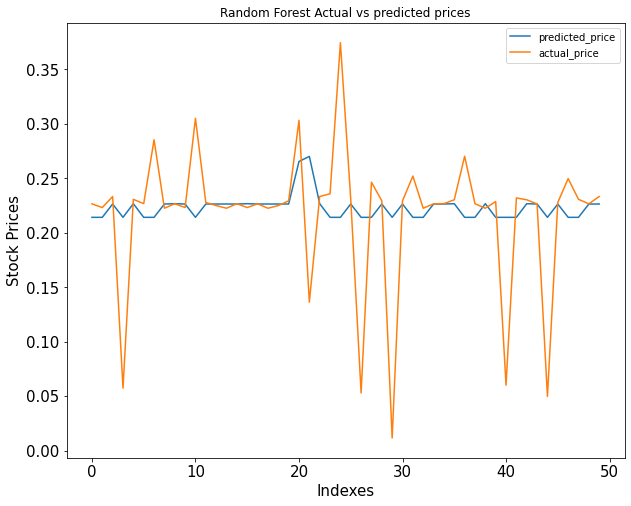

In [ ]:
# Vissualize the results

predicted_dogecoin = pd.DataFrame(data=predicted_dogecoin[:50], columns=['Prices'])
ax = predicted_dogecoin.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest Actual vs predicted prices',fontsize=(15))#predicted value
ax.set_xlabel("Indexes", fontsize=(15))
ax.set_ylabel("Stock Prices", fontsize=(15))
y_dogecoin_test_df = pd.DataFrame(y_dogecoin_test[:50], columns = ['close'])
fig = y_dogecoin_test_df.rename(columns={"close": "actual_price"}).plot(ax = ax,figsize=(10,8)).get_figure()#actual value